In [129]:
import os
import sys
import numpy as np
import neo
import pandas as pd
import h5py
import ast
import McsPy
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, find_peaks, correlate, gaussian, filtfilt
from scipy import stats
from scipy import signal
from scipy import stats
from scipy import signal
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import McsPy
import McsPy.McsData
from McsPy import ureg, Q_
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy
import time
import glob
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import copy
import pickle
import fnmatch

# Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
#networkx
import plotly.graph_objects as go
import networkx as nx
import matplotlib.patches as mpatche


%matplotlib widget

In [130]:
working_directory = '/Users/jonas/Documents/DATA/MEA_DATA_Aachen_sample/output/2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1'

In [131]:
os.chdir(working_directory)

In [132]:
filename=working_directory.split('/')[-1]

In [133]:
glob.glob('*')

['interesting_burst_zoomed_10082021_b25.png',
 'divided_burst_spatial_zoomed_10082021_b25.png',
 'infodics_2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1.npy',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1_burst_starts_dictionary.npy',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1__raster_firingrate_plot.eps',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1raster_and_FR_plot_10082021_b25.png',
 'interesting_burst_10082021_b25.png',
 'spike_extraction',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1_full_spikedic.npy',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1__raster_firingrate_plot.pdf',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1whole_MEA_Heatmap.png',
 'interesting_burst_10082021_b21.png',
 '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1__raster_firingrate_plot.png',
 'MAIN_RECORDING_Dictionary_2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1.pkl']

In [134]:
'MAIN_RECORDING_Dictionary_'+filename+'.pkl'

'MAIN_RECORDING_Dictionary_2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1.pkl'

In [135]:
MAIN_RECORDING_DICTIONARY = pickle.load(open('MAIN_RECORDING_Dictionary_'+filename+'.pkl', "rb"))

In [136]:
MAIN_RECORDING_DICTIONARY.keys()

dict_keys(['spikedic_MAD', 'network_bursts_seconds', 'fr_dic', 'isi_dictionary', 'isi_average_dic', 'isi_std_dic', 'number_rand_notrand_spikes_per_channel', 'rand_notrand_spikes_per_channel', 'Infos_Recording', 'Infos_Analysis', 'Infos_Anatomy', 'Basics', 'Bursts', 'Interburst-Intervals', 'bursting_time_per_channel', 'bursts_per_channel', 'burst_connections'])

In [137]:
spikedic_MAD = MAIN_RECORDING_DICTIONARY['spikedic_MAD']
tick = MAIN_RECORDING_DICTIONARY['Infos_Recording']['tick']
timelengthrecording_s = MAIN_RECORDING_DICTIONARY['Infos_Recording']['timelengthrecording_s']
info_dics_subrecordings = MAIN_RECORDING_DICTIONARY['Infos_Recording']['info_dics_subrecordings']
first_recording_timepoint = info_dics_subrecordings['0_to_120']['first_recording_timepoint']
scale_factor_for_second = MAIN_RECORDING_DICTIONARY['Infos_Recording']['scale_factor_for_second']
relevant_factor = timelengthrecording_s*0.05


In [153]:
def remove_artefact_spikes(spikes, recording_length, window=0.2):
    
    removing_times = []
    i = 0
    removed_spikes = {} 
    while i < timelengthrecording_s:
        print(i)
        activechannels = 0
        for key in spikes:
            for s in spikes[key]:
                if i <= s*tick*scale_factor_for_second < (i + window):
                    activechannels += 1
        if activechannels >= 250:
            removing_times.append(i)
        i += window
    
    
    for key in spikes:
        new_spikes = []
        for s in spikes[key]:
            for time in removing_times:
                if time <= s*tick*scale_factor_for_second < (time + window):
                    print('removed spike from channel ' + key)
                else:
                    new_spikes.append(s)
        removed_spikes[key] = list(np.unique(new_spikes))

    return removed_spikes

In [154]:
spikedic_MAD = remove_artefact_spikes(spikes=spikedic_MAD, recording_length=timelengthrecording_s)

0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2
1.4
1.5999999999999999
1.7999999999999998
1.9999999999999998
2.1999999999999997
2.4
2.6
2.8000000000000003
3.0000000000000004
3.2000000000000006
3.400000000000001
3.600000000000001
3.800000000000001
4.000000000000001
4.200000000000001
4.400000000000001
4.600000000000001
4.800000000000002
5.000000000000002
5.200000000000002
5.400000000000002
5.600000000000002
5.8000000000000025
6.000000000000003
6.200000000000003
6.400000000000003
6.600000000000003
6.800000000000003
7.0000000000000036
7.200000000000004
7.400000000000004
7.600000000000004
7.800000000000004
8.000000000000004
8.200000000000003
8.400000000000002
8.600000000000001
8.8
9.0
9.2
9.399999999999999
9.599999999999998
9.799999999999997
9.999999999999996
10.199999999999996
10.399999999999995
10.599999999999994
10.799999999999994
10.999999999999993
11.199999999999992
11.399999999999991
11.59999999999999
11.79999999999999
11.99999999999999
12.199999999999989
12.399999999999988
12.59999999999998

97.20000000000084
97.40000000000084
97.60000000000085
97.80000000000085
98.00000000000085
98.20000000000086
98.40000000000086
98.60000000000086
98.80000000000086
99.00000000000087
99.20000000000087
99.40000000000087
99.60000000000088
99.80000000000088
100.00000000000088
100.20000000000088
100.40000000000089
100.60000000000089
100.80000000000089
101.0000000000009
101.2000000000009
101.4000000000009
101.6000000000009
101.8000000000009
102.00000000000091
102.20000000000091
102.40000000000092
102.60000000000092
102.80000000000092
103.00000000000092
103.20000000000093
103.40000000000093
103.60000000000093
103.80000000000094
104.00000000000094
104.20000000000094
104.40000000000094
104.60000000000095
104.80000000000095
105.00000000000095
105.20000000000095
105.40000000000096
105.60000000000096
105.80000000000096
106.00000000000097
106.20000000000097
106.40000000000097
106.60000000000097
106.80000000000098
107.00000000000098
107.20000000000098
107.40000000000099
107.60000000000099
107.80000000

In [138]:
# to use when only relevant channels shall be plotted
'''
active_channels = 0
spikedic_seconds = {}
for key in spikedic_MAD:
    relevant_factor = timelengthrecording_s*0.05
    if len(spikedic_MAD[key])>relevant_factor:
        sec_array = np.asarray(spikedic_MAD[key])*tick*scale_factor_for_second
        spikedic_seconds[key]=sec_array
        active_channels += 1
spikearray_seconds = np.asarray(list(spikedic_seconds.values()))  
'''

# to use when all channels shall be plotted
active_channels = 0
spikedic_seconds = {}
for key in spikedic_MAD:
    sec_array = np.asarray(spikedic_MAD[key])*tick*scale_factor_for_second
    spikedic_seconds[key]=sec_array
    active_channels += 1
spikearray_seconds = np.asarray(list(spikedic_seconds.values()))  


'\nactive_channels = 0\nspikedic_seconds = {}\nfor key in spikedic_MAD:\n    relevant_factor = timelengthrecording_s*0.05\n    if len(spikedic_MAD[key])>relevant_factor:\n        sec_array = np.asarray(spikedic_MAD[key])*tick*scale_factor_for_second\n        spikedic_seconds[key]=sec_array\n        active_channels += 1\nspikearray_seconds = np.asarray(list(spikedic_seconds.values()))  \n'

In [147]:
type(spikearray_seconds[0])

numpy.ndarray

In [148]:
def remove_artefact_spikes(spikes, recording_length, window=0.002):
    
    new_list = []
    i = 0
    spikes = [i.tolist() for i in spikes]
    
    while i < timelengthrecording_s:
        activechannels = 0
        for channel in spikes:
            for s in channel:
                if i <= s < (i + window):
                    activechannels += 1
        if activechannels >= 250:
            for channel in spikes:
                for s in channel:
                    if i <= s < (i + window):
                        channel.remove(s)
        
        i += window
    return spikes
                        
                        

In [149]:
def remove_artefact_spikes(spikes, recording_length, window=0.002):
    
    removing_times = []
    i = 0
    removed_spikes = {} 
    while i < timelengthrecording_s:
        activechannels = 0
        for key in spikes:
            for s in spikes[key]:
                if i <= s < (i + window):
                    activechannels += 1
        if activechannels >= 250:
            removing_times.append(i)
    
    
    for key in spikes:
        new_spikes = []
        for time in removing_times:
            for s in spikes[key]:
                if time <= s < (time + window):
                    print('removed spike')
                else:
                    new_spikes.append(s)
        removed_spikes[key] = new_spikes

    return removed_spikes
                     

In [150]:
#ss = remove_artefact_spikes(spikes = spikearray_seconds, recording_length=timelengthrecording_s)

In [151]:
#t = [i.tolist() for i in spikearray_seconds]

In [152]:
len(spikedic_MAD['G13'])

24

In [141]:
# get a 1-D array with every detected spike
scale_factor_for_milisecond = 1e-03
full_spike_list = []
full_spike_list_seconds = []
for key in spikedic_MAD:
    if len(spikedic_MAD[key])>relevant_factor:
        x = list(np.asarray(spikedic_MAD[key])*scale_factor_for_milisecond*tick)
        full_spike_list = full_spike_list + x

        xs = list(np.asarray(spikedic_MAD[key])*scale_factor_for_second*tick)
        full_spike_list_seconds = full_spike_list_seconds + xs
full_spikes = sorted(full_spike_list)
full_spikes_seconds = sorted(full_spike_list_seconds)

In [142]:
mean_fr_whole_recording = np.around((len(full_spikes_seconds) / timelengthrecording_s), 3)

In [143]:
mean_fr_whole_recording

42.467

In [144]:
full_spikes_seconds

[0.7632,
 0.766,
 0.7691199999999999,
 0.77104,
 0.77168,
 0.7736799999999999,
 0.77476,
 0.77488,
 0.7749199999999999,
 0.77504,
 0.77584,
 0.7759199999999999,
 0.7763599999999999,
 0.7768799999999999,
 0.77832,
 0.7797599999999999,
 0.77992,
 0.781,
 0.78168,
 0.7824399999999999,
 0.7831199999999999,
 0.7835599999999999,
 0.7845599999999999,
 0.78548,
 0.7874399999999999,
 0.7912399999999999,
 0.7921199999999999,
 0.79216,
 0.7957599999999999,
 0.79636,
 0.80924,
 0.82316,
 0.8251999999999999,
 0.82524,
 0.8252799999999999,
 0.82716,
 0.8277999999999999,
 0.8278399999999999,
 0.82868,
 0.829,
 0.83088,
 0.8309599999999999,
 0.831,
 0.8316,
 0.83232,
 0.8328,
 0.83484,
 0.8416,
 1.2092399999999999,
 1.89156,
 2.7676800000000004,
 2.9783999999999997,
 4.47532,
 4.47884,
 4.47912,
 4.48628,
 4.48752,
 4.4879999999999995,
 4.48996,
 4.49248,
 4.49264,
 4.49268,
 4.49268,
 4.4928,
 4.4948,
 4.49488,
 4.4963999999999995,
 4.49772,
 4.49816,
 4.49824,
 4.4984399999999996,
 4.50084,
 4.50328

In [93]:
 #define bins 
binsize = 0.005 #seconds
#bins= np.arange(0, timelengthrecording_s+binsize, binsize)

# make a histogram 
#full_spikes_binned = np.histogram(full_spikes_seconds, bins)[0]


#trial of population burst plot as inspired by Andrea Corna
bins = int(timelengthrecording_s / binsize)+1

firing_rate_histogram = np.histogram(full_spikes_seconds, bins=bins)
firing_rate = firing_rate_histogram[0]*200 #conversion to hertz
#firing_rate = firing_rate_histogram[0]

In [94]:
bins


24080

In [95]:
len(firing_rate_histogram[0])

24080

In [96]:
len(full_spikes_seconds)

5113

In [97]:
firing_rate_histogram

(array([2, 3, 9, ..., 4, 0, 3]),
 array([  0.7632    ,   0.76815068,   0.77310136, ..., 119.96565864,
        119.97060932, 119.97556   ]))

In [98]:
firing_rate_histogram[0][:500]


array([2, 3, 9, 6, 5, 3, 2, 0, 0, 1, 0, 0, 5, 9, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
def gaussian_smoothing(y, window_size=10, sigma=500):

    filt = signal.gaussian(window_size, sigma)

    return signal.convolve(y, filt, mode='same')


In [100]:
# using firing rate histogram already conversed to hertz

N = int(1/binsize) # für eine Sekunde, das Sliding window, also letztlich number of bins
plot_N = int(0.01/binsize)
# gaussian smmothing fo the firing rate and moving average
fr_gau = gaussian_smoothing(firing_rate)
plot_fr_gau = gaussian_smoothing(firing_rate)

ma_fr_gau = np.convolve(fr_gau, np.ones(N)/N, mode='full')
plotting_ma_fr_gau = np.convolve(fr_gau, np.ones(plot_N)/plot_N, mode='full')


In [101]:
fr_gau[:300]

array([4999.90470133, 5599.9276009 , 5999.9482006 , 5999.96900021,
       5999.96580022, 6199.93050083, 5799.9067012 , 5199.87980194,
       4399.87620216, 4999.84230281, 4399.89300156, 3999.93800076,
       3599.97900013, 3599.98940008, 3599.98540018, 3399.9791001 ,
       3399.95110044, 3399.90950139, 2399.91480161,  599.97890039,
        199.99190016,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [102]:
fig = plt.figure(figsize = (10,6))
gs = fig.add_gridspec(3, hspace = 0, height_ratios=[1,1,1])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black', linewidth=0.5)
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].plot(fr_gau, color = 'red', linewidth=0.5)
axs[2].plot(plotting_ma_fr_gau)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Firing Rate [Hz]')

In [103]:
# we look for the mean of the MA as threshold
# we arrange this mean in an array for plotting
mean_ma_fr_gau = np.mean(ma_fr_gau)
std_ma_fr_gau = np.std(ma_fr_gau)
network_burst_threshold = mean_ma_fr_gau
shape_for_threshold = np.shape(ma_fr_gau)
network_burst_threshold_array = np.full(shape_for_threshold, network_burst_threshold)
    

In [104]:
network_burst_threshold_array

array([420.58699518, 420.58699518, 420.58699518, ..., 420.58699518,
       420.58699518, 420.58699518])

In [105]:
#network_burst_threshold = 1*std_ma_fr_gau

In [106]:
# now we identify the burts from the network and will extract an array with 
# tuples containing the burst start and end times
bursts= []
burst_start = []
burst_seconds_start = []
burst_end = []
burst_seconds_end = []
for index in range(0, len(ma_fr_gau[:-N])):
    if ma_fr_gau[index+N] > network_burst_threshold:
        if ma_fr_gau[index+N-1] <= network_burst_threshold:
            burst_start.append(index)
        if index == 0:
            burst_start.append(0)
            #burst_seconds_start.append((index+N)*0.005)
    else:
        if (ma_fr_gau[index+N-1] > network_burst_threshold) and (len(burst_start)>0):
            if index+N > len(ma_fr_gau):
                ending = len(ma_fr_gau)
            else: 
                ending = index + N

            burst_end.append(ending)
            #burst_seconds_end.append((ending)*0.005)
bursts = list(zip(burst_start, burst_end))
    

In [107]:
for i in burst_start:
    burst_seconds_start.append(firing_rate_histogram[1][i])
for i in burst_end:
    if i >= len(firing_rate_histogram[1]):
        burst_seconds_end.append(firing_rate_histogram[1][-1])
    else:
        burst_seconds_end.append(firing_rate_histogram[1][i])

bursts_seconds = list(zip(burst_seconds_start, burst_seconds_end))
# bursts sind jetzt im 5ms bin   


In [108]:
def zoom_signal(fr, spiketimes, start_in_seconds, stop_in_seconds):
    
    '''
    for zooming in on the plot below
    '''
    
    start = start_in_seconds*200
    stop = stop_in_seconds*200
    
    cutted_fr_array = fr[start:stop+1]
    
    cutted_spiketimes = []
    for channel_spikes in spiketimes:
        s = [y for y in channel_spikes if stop_in_seconds > y >= start_in_seconds]
        cutted_spiketimes.append(s)
        
    return cutted_fr_array, cutted_spiketimes
        
        
        
        
    
    
    

In [109]:
a, b = zoom_signal(fr=fr_gau, spiketimes=spikearray_seconds, start_in_seconds=14, stop_in_seconds=30)

In [110]:
timelengthrecording_s

120.39999999999999

In [111]:
# logarhitmic y scale

fig = plt.figure(figsize = (10,6))
gs = fig.add_gridspec(3, hspace = 0, height_ratios=[1,1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(fr_gau, color= 'black', linewidth=0.5)
axs[0].set_ylabel('Firing Rate [Hz]')
#axs[0].set_yscale('symlog')
axs[0].set_ylim(0, 10000)
axs[1].set_ylim(0, 10000)
axs[1].plot(ma_fr_gau, color = 'black', linewidth=0.5)
axs[1].plot(network_burst_threshold_array, color='red', linewidth = 0.5)
axs[2].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5,
                 linelengths = 2, colors = 'black')
axs[2].set_ylabel('MEA Channels')

for ax in axs:
    for i in bursts_seconds:
        axs[2].axvspan(i[0], i[1], facecolor = '#5B89A6', alpha = 0.3)
#fig.savefig(filename+ '__raster_firingrate_plot.pdf', dpi=300)
#fig.savefig(filename+ '__raster_firingrate_plot.eps', dpi=300)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Firing Rate [Hz]')

(0.0, 10000.0)

(0.0, 10000.0)

Text(0, 0.5, 'MEA Channels')

In [47]:
spikearray_seconds

[[17.57872,
  58.14472,
  62.547439999999995,
  62.552,
  76.44824,
  87.25644,
  90.36084,
  90.36412,
  90.37516,
  90.39164,
  106.60356,
  106.60752,
  106.62012,
  106.6302,
  113.36112,
  113.3706,
  113.37556,
  118.99275999999999,
  118.99856],
 [62.54748, 113.36108, 113.37052, 113.37504, 118.99271999999999],
 [62.547439999999995,
  76.44784,
  113.36108,
  113.37056,
  113.37451999999999,
  118.99159999999999],
 [62.54748,
  62.552319999999995,
  62.849639999999994,
  63.44876,
  76.448,
  87.25652,
  90.33176,
  90.34515999999999,
  90.35155999999999,
  90.35428,
  90.35916,
  90.36308,
  90.36543999999999,
  90.37071999999999,
  90.37472,
  90.37971999999999,
  90.38444,
  90.39052,
  90.392,
  90.40056,
  90.41051999999999,
  90.49643999999999,
  90.49911999999999,
  90.5018,
  90.53196,
  90.5578,
  90.56164,
  90.56479999999999,
  90.58936,
  90.62692,
  90.6292,
  90.67215999999999,
  90.84996,
  90.85628,
  106.5894,
  106.60288,
  106.60615999999999,
  106.60712,
  106

In [52]:
def remove_artefact_caused_networkbursts(spikes, networkbursts):
    
    
    remove_burst_list = []
    for i in networkbursts:
        active_channels = 0
        start = i[0]
        stop = i[1]
        for c in spikes:
            if len([s for s in list(c) if start < s < stop]) > 0:
                active_channels +=1
        
        if active_channels > 250:
            remove_burst_list.append(i)
            
    return remove_burst_list
            

In [53]:
remove_list = remove_artefact_caused_networkbursts(spikes=spikearray_seconds, networkbursts=bursts_seconds)

In [54]:
# remove artefacts from the list
for artefact_burst in remove_list:
    bursts_seconds.remove(artefact_burst)

In [55]:
# logarhitmic y scale

fig = plt.figure(figsize = (10,6))
gs = fig.add_gridspec(3, hspace = 0, height_ratios=[1,1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(fr_gau, color= 'black', linewidth=0.5)
axs[0].set_ylabel('Firing Rate [Hz]')
#axs[0].set_yscale('symlog')
axs[0].set_ylim(0, 10000)
axs[1].set_ylim(0, 10000)
axs[1].plot(ma_fr_gau, color = 'black', linewidth=0.5)
axs[1].plot(network_burst_threshold_array, color='red', linewidth = 0.5)
axs[2].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5,
                 linelengths = 2, colors = 'black')
axs[2].set_ylabel('MEA Channels')

for ax in axs:
    for i in bursts_seconds:
        axs[2].axvspan(i[0], i[1], facecolor = '#5B89A6', alpha = 0.3)
#fig.savefig(filename+ '__raster_firingrate_plot.pdf', dpi=300)
#fig.savefig(filename+ '__raster_firingrate_plot.eps', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Firing Rate [Hz]')

(0.0, 10000.0)

(0.0, 10000.0)

Text(0, 0.5, 'MEA Channels')

def remove_artefact_spikes(spikes, length_recordin):
    
    
    für die recording länge: wenn innerhalb der Zeit mehr als 250 
        kanäle gleichzeitig active innerhalb von 2ms, dann werden alle rausgeworfen

In [255]:
l.remove(5)

In [151]:
fr_dic = MAIN_RECORDING_DICTIONARY['fr_dic']

In [158]:
fr_dic_values = list(fr_dic.values())

(array([171.,  41.,  18.,   8.,   5.,   1.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.10631229, 0.21262458, 0.31893688, 0.42524917,
        0.53156146, 0.63787375, 0.74418605, 0.85049834, 0.95681063,
        1.06312292, 1.16943522, 1.27574751, 1.3820598 , 1.48837209,
        1.59468439, 1.70099668, 1.80730897, 1.91362126, 2.01993355,
        2.12624585, 2.23255814, 2.33887043, 2.44518272, 2.55149502,
        2.65780731, 2.7641196 , 2.87043189, 2.97674419, 3.08305648,
        3.18936877]),
 <BarContainer object of 30 artists>)

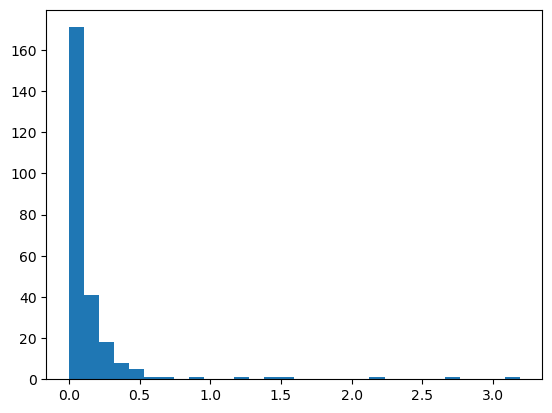

In [220]:
plt.hist(fr_dic_values, bins=30)

Text(0, 0.5, 'Firing Rate [Hz]')

Text(0, 0.5, 'Relevant Channels')

Text(0.5, 0.98, '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1')

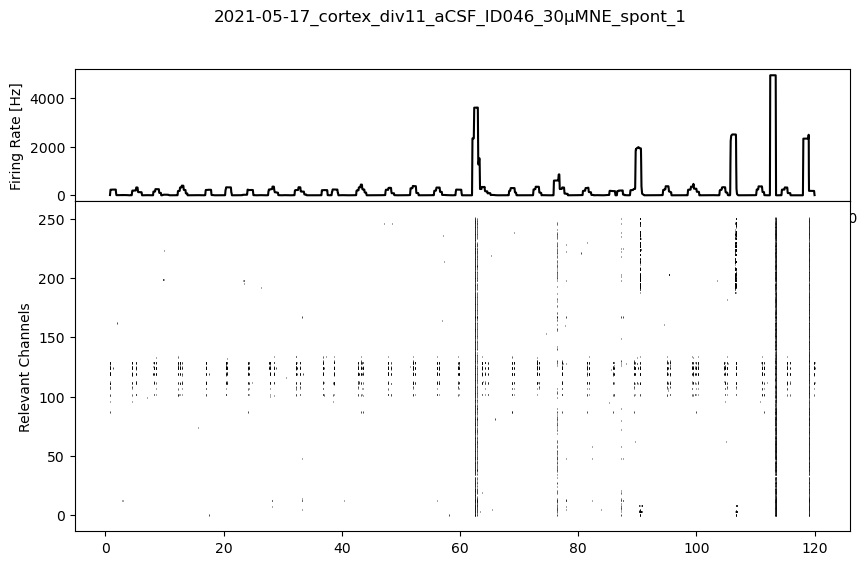

In [160]:
fig = plt.figure(figsize = (10,6))
gs = fig.add_gridspec(2, hspace = 0, height_ratios=[2,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black')
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5,
                 linelengths = 1, colors = 'black')
axs[1].set_ylabel('Relevant Channels')
fig.suptitle(filename)

#for ax in axs:
#    for i in bursts_seconds:
#        axs[1].axvspan(i[0], i[1], facecolor = '#5B89A6', alpha = 0.3)
#fig.savefig(filename+ '__raster_firingrate_plot_solo.png', dpi=300)

In [161]:
# identify the longest burst and longest interburst-interval


In [162]:
#longest bursts:

longest_burst = 0
longest_burst_i = 0
for i in bursts_seconds:
    burstinterval = i[1]-i[0]
    if burstinterval > longest_burst:
        longest_burst = burstinterval
        longest_burst_i = i

In [163]:
# longest_interburst interval:

longest_ibi = 0
longest_ibi_times = (0, 0)

for i in range(1, len(bursts_seconds)-1):
    ibi = bursts_seconds[i+1][0] - bursts_seconds[i][1]
    if ibi > longest_ibi:
        longest_ibi = ibi
        longest_ibi_times = ((bursts_seconds[i][1]), (bursts_seconds[i+1][0])) 

In [164]:
longest_ibi_times

(82.40485401827243, 88.66251278239203)

Text(0, 0.5, 'Firing Rate [Hz]')

Text(0, 0.5, 'Relevant Channels')

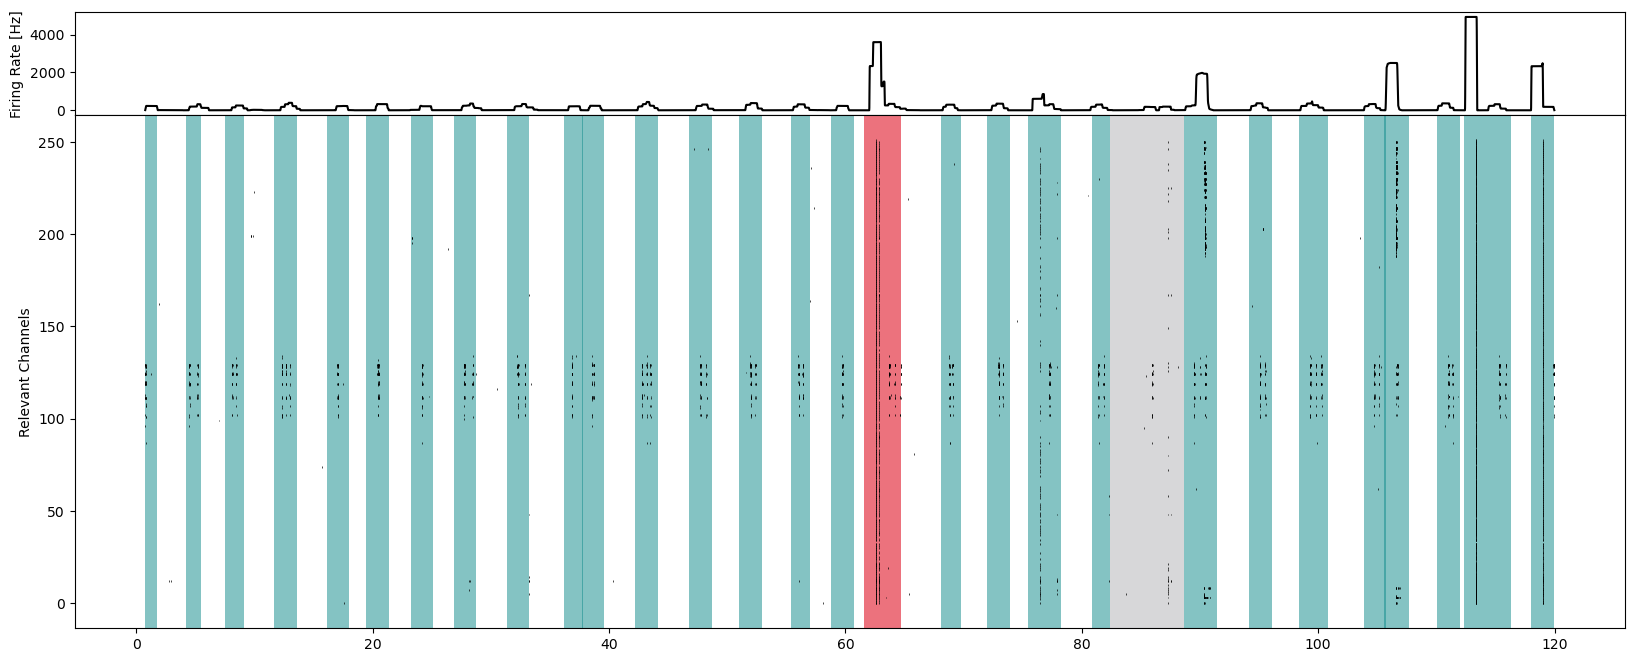

In [166]:
fig = plt.figure(figsize = (20,8))
gs = fig.add_gridspec(2, hspace = 0, height_ratios=[1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black')
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5, linelengths = 1)
axs[1].set_ylabel('Relevant Channels')

for ax in axs:
    for i in bursts_seconds:
        axs[1].axvspan(i[0], i[1], facecolor = '#118C8C', alpha = 0.3)
        axs[1].axvspan(longest_burst_i[0], longest_burst_i[1], facecolor = '#F2727D', alpha = 0.2, label = 'longest network burst')
        axs[1].axvspan(longest_ibi_times[0], longest_ibi_times[1], facecolor = '#D7D7D9', alpha = 0.1, ls =':')
        
#fig.savefig(filename+'raster_and_FR_plot.png', dpi=300)
        


In [167]:
# next, we want to isolate these two areas for a spade analysis

In [168]:
def subdivide_spiketrain(spiketrain, sub_start = 0, sub_stop = 10, tick=40, scale_factor_for_second=1e-06):
    '''
    Excpects: 
        a spiketrain with tick datapoints
        default ticks are 40
        default scale_factor_for_seconds = 1e-06
        provide the start and stop of the desired sub in seconds
    
    Does:
        converts the desired seconds into data ticks
        checks if the spikes of the given spiketrain is in the desired subs
        substracts the starting time -->
        
    Returns:
        a spiketrain dictionary that again starts from zero
    
    '''
    sub_start_tick = sub_start / (tick*scale_factor_for_second)
    sub_stop_tick = sub_stop / (tick*scale_factor_for_second)
    sub_spiketrain = {}
  
    for key in spiketrain: 
        list_per_key = []
        for i in spiketrain[key]:
            if (i>=sub_start_tick ) & (i<sub_stop_tick):
                list_per_key.append(int(i-sub_start_tick))
        sub_spiketrain[key]=list_per_key

    return sub_spiketrain

In [169]:
burst_seconds_start

[0.7632,
 4.179168787375415,
 7.491173307308971,
 11.674497401993355,
 16.100404787375417,
 19.4668667807309,
 23.22938312624585,
 26.853280448504986,
 31.37325074252492,
 36.2298672358804,
 37.7150710564784,
 42.17068251827242,
 46.8045184385382,
 51.01259593023256,
 55.39889788039867,
 58.8000146295681,
 61.54269101827242,
 68.06768647009967,
 72.01832863289036,
 75.45410013787375,
 80.84539000664452,
 88.66251278239203,
 94.1181614833887,
 98.38564712790698,
 103.83634514950167,
 105.58393497840531,
 110.06925051661129,
 112.35646440033223,
 114.3911936345515,
 117.99033755980066]

In [170]:
burst_seconds_end

[1.7632372392026578,
 5.501000187707642,
 9.11499615116279,
 13.644867803986712,
 18.006416357142857,
 21.41743446511628,
 25.140345375415283,
 28.76424269767442,
 33.26936095348837,
 37.81903532392027,
 39.57157583222591,
 44.165806317275745,
 48.73033272591362,
 52.982966332225914,
 57.037572762458474,
 60.69612484053156,
 64.71607651495017,
 69.80042426079734,
 73.96394563787375,
 78.251234,
 82.40485401827243,
 91.47449868272426,
 96.08358120598007,
 100.8263320730897,
 105.74235671926911,
 107.65826964784053,
 112.02971955980067,
 114.37634159634551,
 116.33185996013289,
 119.97556]

In [171]:
st_longest_burst = subdivide_spiketrain(spikedic_MAD, longest_burst_i[0], longest_burst_i[1])

In [172]:
st_longest_ibi = subdivide_spiketrain(spikedic_MAD, longest_ibi_times[0], longest_ibi_times[1])

In [173]:
# in the next step, we want to find the firing rates for every channel in hertz for these subdivisions

longest_burst_firingrate_dic = {}

for key in st_longest_burst:
    fr_channel = len(st_longest_burst[key])/longest_burst # i.e, number of spikes divided by duration -> results in number per second
    longest_burst_firingrate_dic[key] = fr_channel

In [174]:
# same is done for the longest interburst interval

longest_ibi_firingrate_dic = {}

for key in st_longest_ibi:
    fr_channel = len(st_longest_ibi[key])/longest_ibi # i.e, number of spikes divided by duration -> results in number per second
    longest_ibi_firingrate_dic[key] = fr_channel

In [175]:
# and lastly for the whole recording

whole_recording_firingrate_dic = {}

for key in spikedic_MAD:
    fr_channel = len(spikedic_MAD[key])/timelengthrecording_s # i.e, number of spikes divided by duration -> results in number per second
    whole_recording_firingrate_dic[key] = fr_channel

In [176]:
# next we plot this on a mea array:

mea_array=np.empty((16,16,))
mea_array[:]=np.nan
columnlist =['A','B','C','D','E','F','G','H','J','K','L','M','N','O','P','R']
df = pd.DataFrame(data=mea_array,columns=columnlist)
df.index+=1

df1 = pd.DataFrame(data=mea_array,columns=columnlist)
df1.index+=1

df2 = pd.DataFrame(data=mea_array,columns=columnlist)
df2.index+=1


In [177]:
# function to fill the dataframe with the 

def get_dict_values(df, dic):
    
    for i in df.columns:
        for j in range(0, 16):
            keystring = i+str(df.index[j])
            #print(keystring)
            if keystring in dic.keys():
                df.loc[df.index[j],i]=dic[keystring]
            
                
    
    return df

In [178]:
use_df_copy = df.copy()
use_df_copy1 = df1.copy()
use_df_copy2 = df2.copy()

In [179]:
#the dataframe for burst


df_fr_burst = get_dict_values(use_df_copy, longest_burst_firingrate_dic)

In [180]:
df_fr_burst

,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,R
1,NaN,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,1.575604,1.260483,1.260483,3.781450,0.945363,0.630242,0.945363,0.945363,NaN
2,0.945363,0.315121,0.945363,0.945363,0.945363,2.520967,1.260483,3.151209,4.411692,6.302417,5.987297,1.260483,0.315121,0.945363,0.945363,0.945363
3,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,3.466330,1.575604,1.575604,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363
4,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.630242,0.945363,1.260483,0.945363,0.630242,0.945363,0.945363,0.945363,0.945363
5,1.575604,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
6,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,1.890725
7,1.260483,0.945363,0.945363,1.260483,0.945363,0.315121,1.575604,0.945363,0.945363,0.945363,1.260483,0.945363,0.945363,0.630242,0.945363,0.945363
8,0.945363,0.945363,0.945363,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
9,0.945363,1.575604,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
10,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.630242,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363


In [181]:
# data frame for interburst interval
df_fr_ibi = get_dict_values(use_df_copy1, longest_ibi_firingrate_dic)

In [182]:
df_fr_burst

,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,R
1,NaN,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,1.575604,1.260483,1.260483,3.781450,0.945363,0.630242,0.945363,0.945363,NaN
2,0.945363,0.315121,0.945363,0.945363,0.945363,2.520967,1.260483,3.151209,4.411692,6.302417,5.987297,1.260483,0.315121,0.945363,0.945363,0.945363
3,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,3.466330,1.575604,1.575604,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363
4,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.630242,0.945363,1.260483,0.945363,0.630242,0.945363,0.945363,0.945363,0.945363
5,1.575604,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
6,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363,0.945363,1.890725
7,1.260483,0.945363,0.945363,1.260483,0.945363,0.315121,1.575604,0.945363,0.945363,0.945363,1.260483,0.945363,0.945363,0.630242,0.945363,0.945363
8,0.945363,0.945363,0.945363,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
9,0.945363,1.575604,0.945363,0.315121,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363
10,0.945363,1.260483,0.945363,0.945363,0.945363,0.945363,0.630242,0.945363,0.945363,0.945363,0.945363,0.945363,0.945363,0.315121,0.945363,0.945363


Text(0.5, 0.98, '2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1')

<AxesSubplot:>

Text(0.5, 1.0, 'Firing Rate per Channel - No Burst')

<AxesSubplot:>

Text(0.5, 1.0, 'Firing Rate per Channel - Burst')

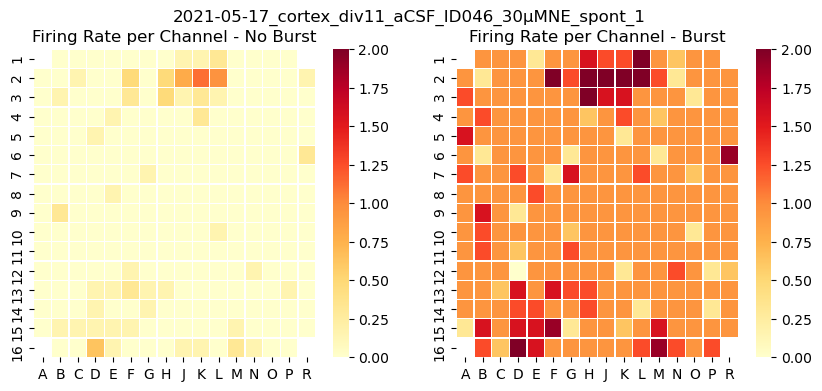

In [186]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))

f.suptitle(filename)
sns.heatmap(df_fr_ibi, annot=False, linewidths=.2, ax=ax1, cmap="YlOrRd", vmax=2)
ax1.set_title('Firing Rate per Channel - No Burst')


sns.heatmap(df_fr_burst, annot=False, linewidths=.2, ax=ax2, cmap="YlOrRd", vmax=2)
ax2.set_title('Firing Rate per Channel - Burst')

#f.savefig(filename+'_MEA_Heatmap.png', dpi = 300)



In [187]:
df_fr_whole = get_dict_values(use_df_copy2, whole_recording_firingrate_dic)

In [188]:
df_fr_whole

,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,R
1,NaN,0.099668,0.074751,0.074751,0.024917,0.074751,0.191030,0.323920,0.157807,0.191030,1.237542,0.124585,0.058140,0.083056,0.074751,NaN
2,0.091362,0.024917,0.191030,0.049834,0.058140,0.880399,0.506645,1.495017,2.200997,3.189369,2.699336,0.257475,0.024917,0.083056,0.083056,0.091362
3,0.116279,0.091362,0.083056,0.066445,0.124585,0.332226,0.116279,1.445183,0.431894,0.714286,0.182724,0.066445,0.083056,0.024917,0.083056,0.066445
4,0.099668,0.107973,0.083056,0.091362,0.074751,0.091362,0.074751,0.066445,0.066445,0.274086,0.066445,0.058140,0.066445,0.066445,0.083056,0.091362
5,0.107973,0.066445,0.074751,0.099668,0.083056,0.099668,0.091362,0.074751,0.074751,0.024917,0.091362,0.083056,0.074751,0.066445,0.091362,0.091362
6,0.066445,0.033223,0.083056,0.091362,0.066445,0.083056,0.033223,0.074751,0.066445,0.066445,0.083056,0.024917,0.091362,0.074751,0.091362,0.174419
7,0.099668,0.083056,0.091362,0.116279,0.083056,0.024917,0.124585,0.074751,0.083056,0.074751,0.099668,0.066445,0.074751,0.041528,0.091362,0.091362
8,0.091362,0.091362,0.083056,0.083056,0.116279,0.083056,0.083056,0.074751,0.066445,0.083056,0.083056,0.066445,0.083056,0.066445,0.066445,0.091362
9,0.083056,0.174419,0.091362,0.024917,0.074751,0.083056,0.091362,0.066445,0.099668,0.066445,0.083056,0.066445,0.074751,0.099668,0.091362,0.091362
10,0.091362,0.099668,0.091362,0.074751,0.091362,0.074751,0.041528,0.091362,0.083056,0.091362,0.124585,0.083056,0.116279,0.033223,0.074751,0.091362


In [189]:
'''
sum_mean_frs = 0
number_of_fr = 0
for key in whole_recording_firingrate_dic:
    if whole_recording_firingrate_dic[key] > 0:
        sum_mean_frs += whole_recording_firingrate_dic[key]
        number_of_fr += 1

mean_fr_whole_recording = np.around((sum_mean_frs/number_of_fr), 4)
'''

'\nsum_mean_frs = 0\nnumber_of_fr = 0\nfor key in whole_recording_firingrate_dic:\n    if whole_recording_firingrate_dic[key] > 0:\n        sum_mean_frs += whole_recording_firingrate_dic[key]\n        number_of_fr += 1\n\nmean_fr_whole_recording = np.around((sum_mean_frs/number_of_fr), 4)\n'

In [190]:
mean_fr_whole_recording

42.467

<AxesSubplot:>

Text(0.5, 1.0, 'Fr Channel2021-05-17_cortex_div11_aCSF_ID046_30µMNE_spont_1 Mean FR Active: 42.467, active channels: 252')

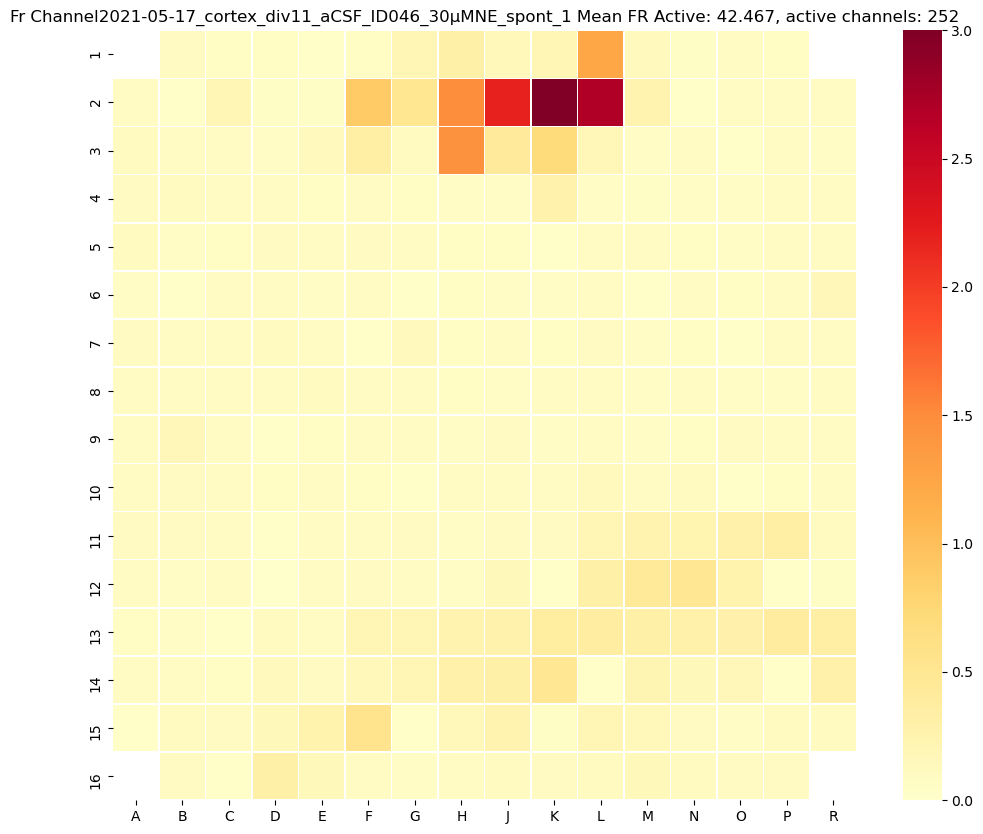

In [191]:
f, ax = plt.subplots(1, 1, figsize = (12,10))

sns.heatmap(df_fr_whole, annot=False, linewidths=.5, ax=ax, cmap="YlOrRd", vmax=3)
ax.set_title('Fr Channel' + filename + ' Mean FR Active: {}, active channels: {}'.format(mean_fr_whole_recording, active_channels))

f.savefig(filename+'whole_MEA_Heatmap.png', dpi = 300)

In [56]:
np.save(filename+'sub_recording_BURST.npy', st_longest_burst)
np.save(filename+'sub_recording_NON-BURST.npy', st_longest_ibi)

In [57]:
filename

'2021-05-17_cortex_div11_aCSF_ID046_30µMNorepinephrine_spont_1_analyzed_on_03082021'

In [58]:
#overviewframe_ac = pd.DataFrame(columns=['aCSF', 'aCSF + 30µM Nor', 'rewash aCSF', 'hCSF', 'hCSF + CNQX'], index=['DIV8', 'DIV11'])

In [59]:
#overviewframe_fr = pd.DataFrame(columns=['aCSF', 'aCSF + 30µM Nor', 'rewash aCSF', 'hCSF', 'hCSF + CNQX'], index=['DIV8', 'DIV11'])

In [60]:
#overviewframe_fr.iloc[0, 4]=mean_fr_whole_recording

In [61]:
#overviewframe_ac.iloc[0, 4]=active_channels

In [62]:
#overviewframe_fr

In [63]:
overviewframe_ac

NameError: name 'overviewframe_ac' is not defined

In [64]:
longest_burst_i

(61.80625938870431, 64.49437591362125)

# Subdivision of a Burst of Interest

In the next part we take a Network Burst and plot it on a small scale to see how the spikes develop. 

Further, we will divide it in 200ms parts to see how the spikes will develop temporarily over the MEA Grid.

Text(0, 0.5, 'Firing Rate [Hz]')

Text(0, 0.5, 'Relevant Channels')

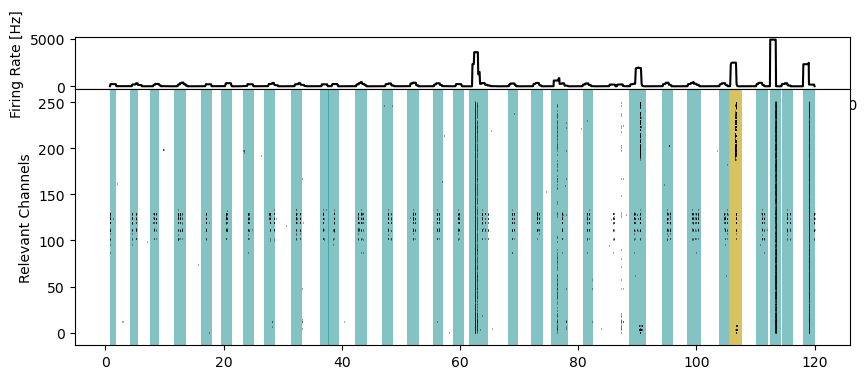

In [193]:
# we plot the beginning figure -> burst of interest is in yellow

# we choose the burst we want to plot and get start and end time in seconds
burst_of_interest = 25
b_of_interest_start = burst_seconds_start[burst_of_interest]
b_of_interest_end = burst_seconds_end[burst_of_interest]



fig = plt.figure(figsize = (10,4))
gs = fig.add_gridspec(2, hspace = 0, height_ratios=[1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black')
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5, linelengths = 1)
axs[1].set_ylabel('Relevant Channels')

for ax in axs:
    for i in bursts_seconds:
        axs[1].axvspan(i[0], i[1], facecolor = '#118C8C', alpha = 0.3)
        
        axs[1].axvspan(b_of_interest_start, 
                       b_of_interest_end, facecolor = '#F2CD5E', alpha = 0.2, 
                       label = 'longest network burst'
                      )
        
fig.savefig(filename+'raster_and_FR_plot_10082021_b25.png', dpi=300, bbox_inches = 'tight')

In [194]:
# in the spikearray_seconds we have every spike used in the whole recording block
# we will now filter them to be in the time region of interest and create burst_of_interest_array

boi_array = []

for i in spikearray_seconds:
    channel_array_list = []
    for j in i:
        if (j >= b_of_interest_start) and (j <= b_of_interest_end):
            channel_array_list.append(j)
    channel_array = np.asarray(channel_array_list)
    boi_array.append(channel_array)

boi_array = np.asarray(boi_array)

Text(0, 0.5, 'Firing Rate [Hz]')

Text(0, 0.5, 'Relevant Channels')

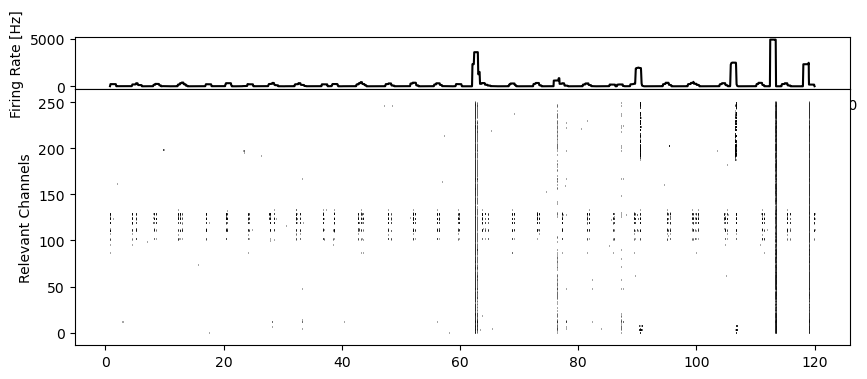

In [195]:
# we can plot this subpart of the array

fig = plt.figure(figsize = (10,4))
gs = fig.add_gridspec(2, hspace = 0, height_ratios=[1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black')
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.5, linelengths = 1)
axs[1].set_ylabel('Relevant Channels')


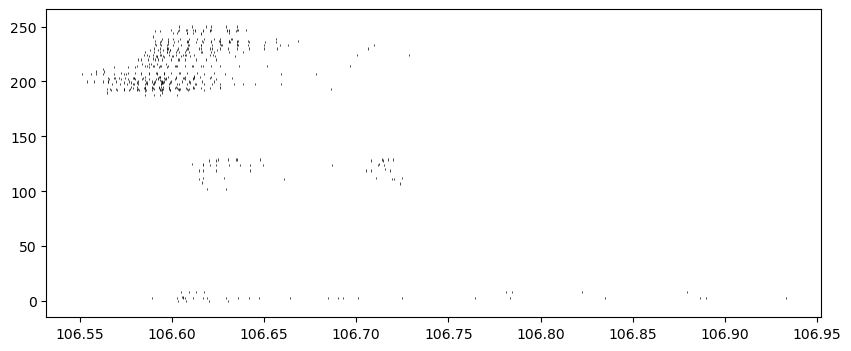

In [196]:
fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax = plt.eventplot(boi_array, color = 'black', linewidths = 0.5, linelengths= 2)

In [197]:
# we use the subdivide function to get the st of the burst of interest

st_burst_of_interest = subdivide_spiketrain(spikedic_MAD, b_of_interest_start, b_of_interest_end)

In [198]:
# we now want to make heatmaps to picture the activity to observe the spatial propagation

# define how much time of the st you want to observe
heatmap_window = 0.2 # in seconds

# make start and endpoints for each of these time-windows:

time_windows = []

# start of the subdivision = rounded start of the burst of interest
i = np.round(b_of_interest_start, 4)

# for every iteration, add the desired heatmap window
while i < b_of_interest_end:
    start = i
    stop = np.round(i+heatmap_window, 4)
    i = i + heatmap_window 
    if stop > b_of_interest_end:
        stop = b_of_interest_end
    time_windows.append((start, stop))


In [199]:
b_of_interest_start

105.58393497840531

In [200]:
time_windows

[(105.5839, 105.7839),
 (105.7839, 105.9839),
 (105.9839, 106.1839),
 (106.18390000000001, 106.3839),
 (106.38390000000001, 106.5839),
 (106.58390000000001, 106.7839),
 (106.78390000000002, 106.9839),
 (106.98390000000002, 107.1839),
 (107.18390000000002, 107.3839),
 (107.38390000000003, 107.5839),
 (107.58390000000003, 107.65826964784053)]

In [201]:
#time_windows = time_windows[3:]

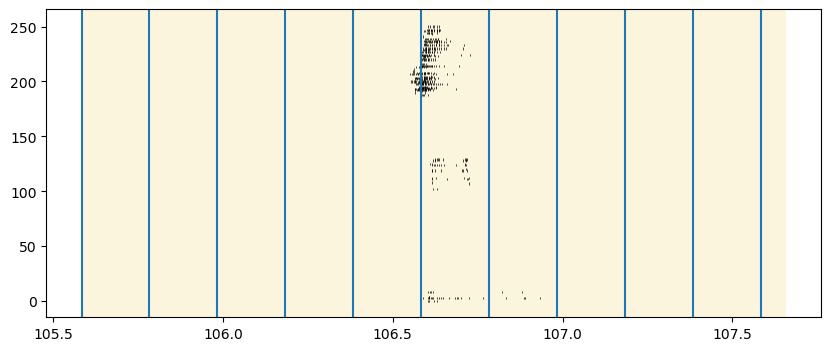

In [202]:
fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax = plt.eventplot(boi_array, color = 'black', linewidths = 0.5, linelengths= 2)
ax = plt.axvspan(b_of_interest_start, 
                       b_of_interest_end, facecolor = '#F2CD5E', alpha = 0.2, 
                       label = 'longest network burst'
                      )

# plot the lines for the subdivisions
for i in time_windows:
    ax = plt.axvline(i[0])
    
    
fig.savefig('interesting_burst_10082021_b21.png', dpi=300, bbox_inches = 'tight')


In [203]:
# we can now
len(time_windows)

11

In [204]:
# we will now create a dictionary with key = starts of the subdivision
# and values = dictionary  of the corresponding spiketrains

subdivided_boi_st = {}
subdivided_boi_fr = {}

for i in time_windows:
    #empty dic for firing rates
    fr_subs = {}
    
    # get the spiketrains for the time subpart
    st = subdivide_spiketrain(spikedic_MAD, i[0], i[1])
    
    # assign the subdivided dictionary to the subdivision dictionary
    subdivided_boi_st[i[0]] = st
    
    # for firing rate, we calculate the fr for each channel
    for key in st:
        fr = len(st[key]) / (i[1]-i[0])
        
        #assign the firing rate to that key
        fr_subs[key] = fr
     
    # the value for the subdivision key is that used subdic, which is emptied in the next loop
    subdivided_boi_fr[i[0]] = fr_subs
        
    
    

In [205]:
# how many subplots we want to create
number_of_heatmaps = len(time_windows)

number_columns = int(number_of_heatmaps / 2)




In [206]:
# for plotting with sns heatmap we need a df first 

# this is done as empty df:

mea_array=np.empty((16,16,))
mea_array[:]=np.nan
columnlist =['A','B','C','D','E','F','G','H','J','K','L','M','N','O','P','R']
df = pd.DataFrame(data=mea_array,columns=columnlist)
df.index+=1


In [207]:
df

,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,R
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Burst Propagation from 105.5839 to 107.6583')

[Text(0.5, 1.0, '0 ms')]

[Text(0.5, 1.0, '200 ms')]

[Text(0.5, 1.0, '400 ms')]

[Text(0.5, 1.0, '600 ms')]

[Text(0.5, 1.0, '800 ms')]

[Text(0.5, 1.0, '1000 ms')]

[Text(0.5, 1.0, '1200 ms')]

[Text(0.5, 1.0, '1400 ms')]

[Text(0.5, 1.0, '1600 ms')]

[Text(0.5, 1.0, '1800 ms')]

IndexError: index 10 is out of bounds for GridSpec with size 10

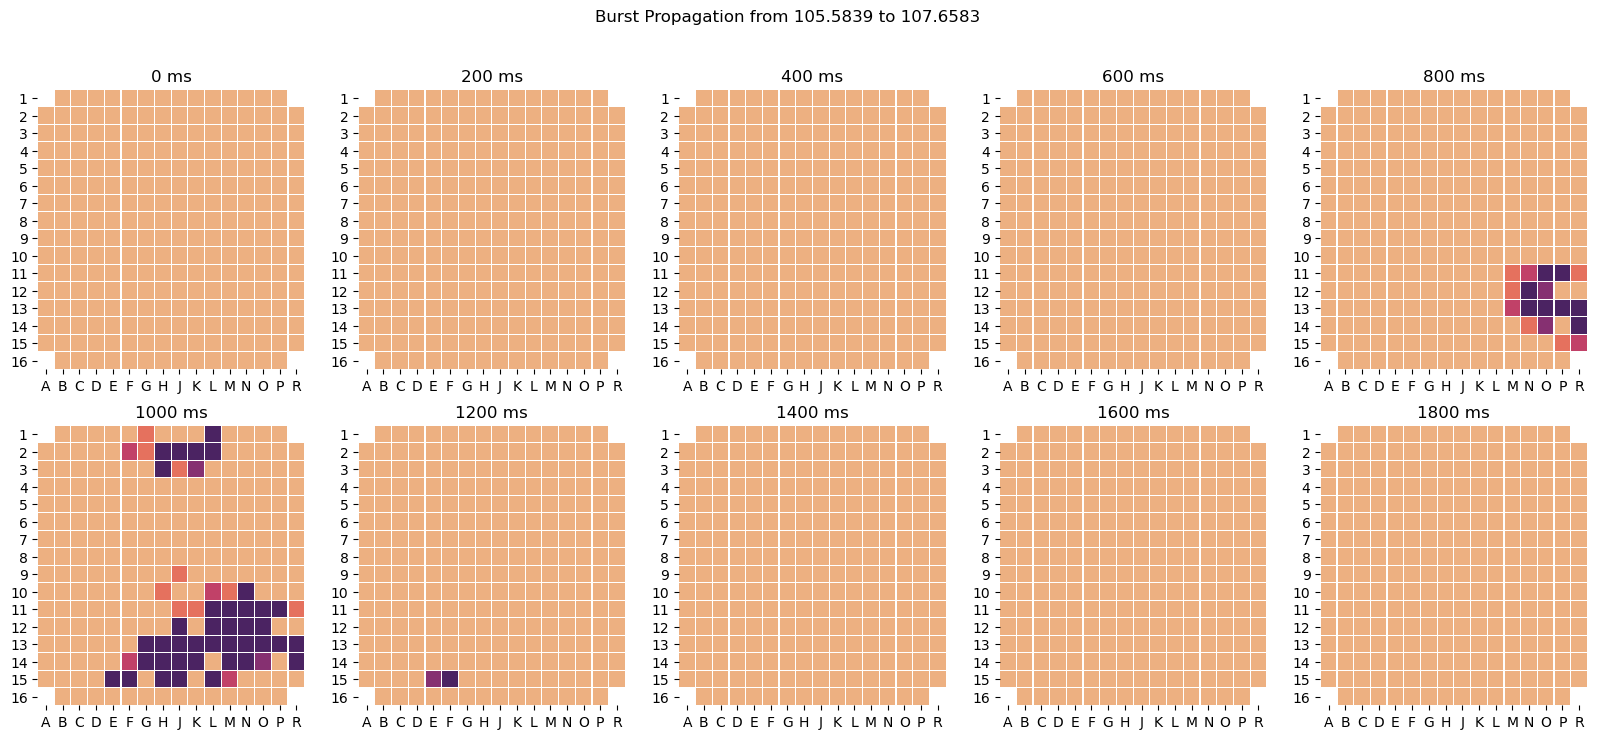

In [208]:
fig = plt.figure(figsize=(20,8))

fig.tight_layout()
fig.suptitle('Burst Propagation from ' + 
             str(np.round(b_of_interest_start, 4))+ ' to ' + 
             str(np.round(b_of_interest_end, 4)))
gs1 = gridspec.GridSpec(2, 5)

#countries = ["Country " + str(i) for i in range(1, 26)]
axs = []
time_intra_burst = 0

for i in range(1, len(time_windows)+1):
    

    plotframe = copy.deepcopy(df)
    
    # get the key for the fr_dic from the time windows:
    key = time_windows[i-1][0] # substract one because we start the for range at 1
    
    #extract the corresponding fr_dic
    fr_dic = subdivided_boi_fr[key]
    
    # fill the dataframe
    plotframe_filled = get_dict_values(plotframe, fr_dic)
    
    axs.append(fig.add_subplot(gs1[i-1]))
    # plot the heatmap
    #sns.heatmap(plotframe_filled, annot=False, linewidths=.5, ax=axstring, cmap="YlOrRd")


    axs[-1] = sns.heatmap(plotframe_filled, 
                          annot=False, vmin=0, vmax = 20, cmap='flare', 
                          cbar = False, linewidths=0.1)
    
    
    plt.setp(axs[-1], 
             title=str(int(time_intra_burst)) + ' ms')
    
    time_intra_burst += (heatmap_window*1000)

fig.savefig('divided_burst_spatial_10082021_b25.png', dpi=300, bbox_inches = 'tight')



## we can try what happens if we zoom in further

In [209]:
b_of_interest_start = 106.5
b_of_interest_end = 106.85

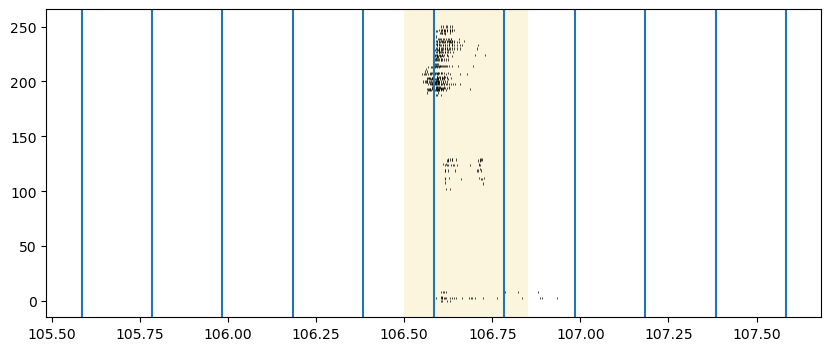

In [210]:
fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax = plt.eventplot(boi_array, color = 'black', linewidths = 0.5, linelengths= 2)
ax = plt.axvspan(b_of_interest_start, 
                       b_of_interest_end, facecolor = '#F2CD5E', alpha = 0.2, 
                       label = 'longest network burst'
                      )

# plot the lines for the subdivisions
for i in time_windows:
    ax = plt.axvline(i[0])
    
    
fig.savefig('interesting_burst_10082021_b25.png', dpi=300, bbox_inches = 'tight')

In [211]:
# we now want to make heatmaps to picture the activity to observe the spatial propagation

# let us make the heatmap window generic, so the burst is always subdivied into 10 subplots
observed_time = b_of_interest_end-b_of_interest_start

heatmap_window = observed_time/10 # in seconds

# make start and endpoints for each of these time-windows:

time_windows = []

# start of the subdivision = rounded start of the burst of interest
i = np.round(b_of_interest_start, 4)

# for every iteration, add the desired heatmap window
while i < b_of_interest_end:
    start = i
    stop = np.round(i+heatmap_window, 4)
    i = i + heatmap_window 
    if stop > b_of_interest_end:
        stop = b_of_interest_end
    time_windows.append((start, stop))


In [212]:
time_windows

[(106.5, 106.535),
 (106.535, 106.57),
 (106.57, 106.605),
 (106.60499999999999, 106.64),
 (106.63999999999999, 106.675),
 (106.67499999999998, 106.71),
 (106.70999999999998, 106.745),
 (106.74499999999998, 106.78),
 (106.77999999999997, 106.815),
 (106.81499999999997, 106.85),
 (106.84999999999997, 106.85)]

In [213]:
# we again obtain the array of that burst
# in the spikearray_seconds we have every spike used in the whole recording block
# we will now filter them to be in the time region of interest and create burst_of_interest_array

boi_array = []

for i in spikearray_seconds:
    channel_array_list = []
    for j in i:
        if (j >= b_of_interest_start) and (j <= b_of_interest_end):
            channel_array_list.append(j)
    channel_array = np.asarray(channel_array_list)
    boi_array.append(channel_array)

boi_array = np.asarray(boi_array)

In [214]:
b_of_interest_end

106.85

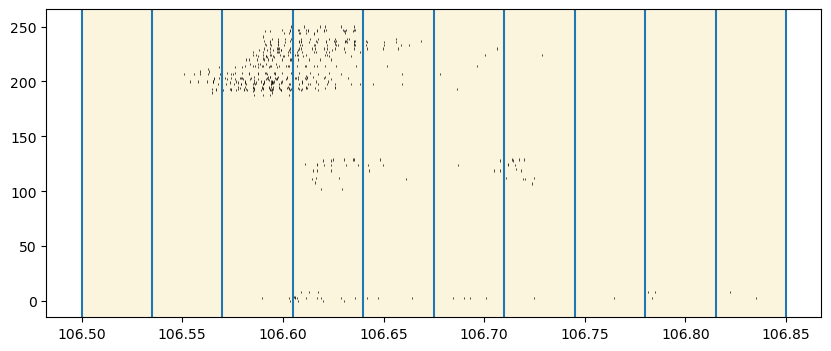

In [215]:
fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax = plt.eventplot(boi_array, color = 'black', linewidths = 0.5, linelengths= 2)
ax = plt.axvspan(b_of_interest_start, 
                       b_of_interest_end, facecolor = '#F2CD5E', alpha = 0.2, 
                       label = 'longest network burst'
                      )

# plot the lines for the subdivisions
for i in time_windows:
    ax = plt.axvline(i[0])
    
    
fig.savefig('interesting_burst_zoomed_10082021_b25.png', dpi=300, bbox_inches = 'tight')

In [216]:
# we will now create a dictionary with key = starts of the subdivision
# and values = dictionary  of the corresponding spiketrains

subdivided_boi_st = {}
subdivided_boi_fr = {}

for i in time_windows:
    #empty dic for firing rates
    fr_subs = {}
    
    # get the spiketrains for the time subpart
    st = subdivide_spiketrain(spikedic_MAD, i[0], i[1])
    
    # assign the subdivided dictionary to the subdivision dictionary
    subdivided_boi_st[i[0]] = st
    
    # for firing rate, we calculate the fr for each channel
    for key in st:
        fr = len(st[key]) / (i[1]-i[0])
        
        #assign the firing rate to that key
        fr_subs[key] = fr
     
    # the value for the subdivision key is that used subdic, which is emptied in the next loop
    subdivided_boi_fr[i[0]] = fr_subs
        

In [217]:
time_windows = time_windows[:10]

Text(0.5, 0.98, 'Burst Propagation from 106.5 to 106.85')

[Text(0.5, 1.0, '0 ms')]

[Text(0.5, 1.0, '34 ms')]

[Text(0.5, 1.0, '69 ms')]

[Text(0.5, 1.0, '104 ms')]

[Text(0.5, 1.0, '139 ms')]

[Text(0.5, 1.0, '174 ms')]

[Text(0.5, 1.0, '209 ms')]

[Text(0.5, 1.0, '244 ms')]

[Text(0.5, 1.0, '279 ms')]

[Text(0.5, 1.0, '314 ms')]

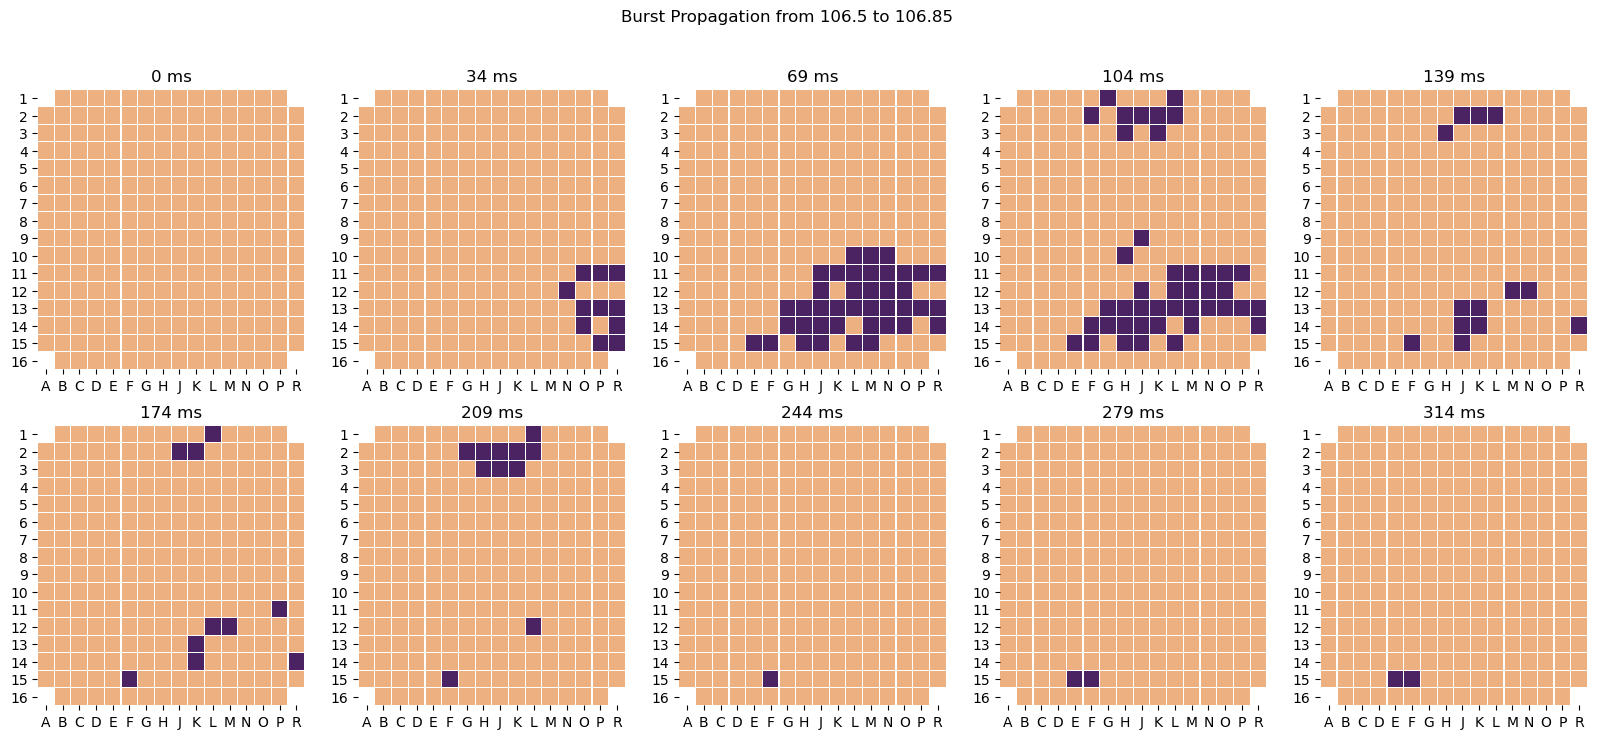

In [218]:
fig = plt.figure(figsize=(20,8))

fig.tight_layout()
fig.suptitle('Burst Propagation from ' + 
             str(np.round(b_of_interest_start, 4))+ ' to ' + 
             str(np.round(b_of_interest_end, 4)))
gs1 = gridspec.GridSpec(2, 5)

#countries = ["Country " + str(i) for i in range(1, 26)]
axs = []
time_intra_burst = 0

for i in range(1, len(time_windows)+1):
    

    plotframe = copy.deepcopy(df)
    
    # get the key for the fr_dic from the time windows:
    key = time_windows[i-1][0] # substract one because we start the for range at 1
    
    #extract the corresponding fr_dic
    fr_dic = subdivided_boi_fr[key]
    
    # fill the dataframe
    plotframe_filled = get_dict_values(plotframe, fr_dic)
    
    axs.append(fig.add_subplot(gs1[i-1]))
    # plot the heatmap
    #sns.heatmap(plotframe_filled, annot=False, linewidths=.5, ax=axstring, cmap="YlOrRd")


    axs[-1] = sns.heatmap(plotframe_filled, 
                          annot=False, vmin=0, vmax = 20, cmap='flare', 
                          cbar = False, linewidths=0.1)
    
    
    plt.setp(axs[-1], 
             title=str(int(time_intra_burst)) + ' ms')
    
    time_intra_burst += (heatmap_window*1000)

fig.savefig('divided_burst_spatial_zoomed_10082021_b25.png', dpi=300, bbox_inches = 'tight')